# Week 7: Regression

In [1]:
# Loading the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

## Day 1: Linear Regression
The setting is as follows: we have some **numerical** data that can be split into two parts:
* **Response** or **target** variable: a single variable for which we want to make construct a model with the goal of making predictions. This variable is stored in a vector-column and is usually labeled by $y$
* **Explanatory** or **input** variables: variables based on which we want to be making the predictions. These variables are usually stored in a matrix $\left[ x_1, x_2, \ldots, x_n \right]$ with each column corresponding to a variable, and the matrix is usually labeled by $X$

If *it makes sense*, then we could construct a linear model for the data:
\begin{equation}\hat{y}(w, x) = w_0 + w_1 x_1 + ... + w_n x_n\end{equation}
where $w = \left[w_1, w_2, \ldots, w_n\right]$ are some **weights** that scale the input variables $x_i$. The model is traditionally build with a **least squares** approach: to find the optimal weights, we minimize the sum of the squared differences between the actual data and what the model predicts for it. In mathematical terms:
\begin{equation} \min_{w} || X w - y||_2^2 \end{equation}

We will first start with a linear model that has one input variable $x$ and an output variable $y$. The model simplifies to :
\begin{equation} \hat{y} = w_0 + w_1 x \end{equation}

We will look at ways to display the data, assess the model, and make predictions

### Example 1
Armand’s Pizza Parlors is a chain of Italian-food restaurants located in a five-state area. Armand’s most successful locations are near college campuses. The managers believe that quarterly sales for these restaurants ($y$) are related positively to the size of the student population ($x$); that is, restaurants near campuses with a large student population tend to generate more sales than those located near campuses with a small student population. Using regression analysis, we can develop an equation showing how the dependent variable $y$ is related to the independent variable $x$. The data is given in `armand_pizza.csv`
* Develop a scatter plot & comment on the nature of the relatioship
* Build the linear model $\hat{y} = w_0 + w_1 x$. Use it to predict the values for $x=5$, $x=8$ and $x=20$
* Calculate the residuals using the formula:
$$\text{resid} = \text{observed} - \text{predicted} = y - \hat{y}$$
* Make a residual plot -- the scatter plot of residuals against $x$-values or against the predicted $\hat{y}$-values.
* Calculate the correlation coefficient $r$ for the association between the student population & the pizza sales.
* Calculate the determination coefficient $r^2$ and interpret its meaning.

In [2]:
# Load the data
df = pd.read_csv('armand_pizza.csv')
df

,population,sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


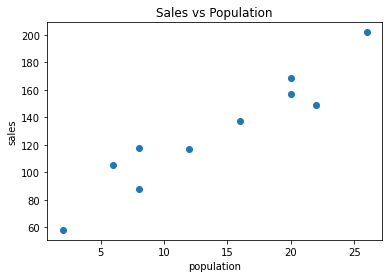

intercept =  60.0
slope = coeff =  5.0
[ 85. 100. 160.]


In [8]:
# Scatter plot

plt.figure()
plt.scatter(df['population'], df['sales'])
plt.xlabel('population')
plt.ylabel('sales')
plt.title('Sales vs Population')
plt.show()

# Build the model

model_1 = LinearRegression()
X = df['population'].to_numpy().reshape(-1,1)
y = df['sales'].to_numpy()

model_1.fit(X, y)
print('intercept = ', model_1.intercept_)
print('slope = coeff = ', model_1.coef_[0])

# Make predictions for x = 5, 8, 20

new_inputs = np.array([5,8,20]).reshape(-1,1)

new_predictions = model_1.predict(new_inputs)
print(new_predictions)

<AxesSubplot:xlabel='population', ylabel='sales'>

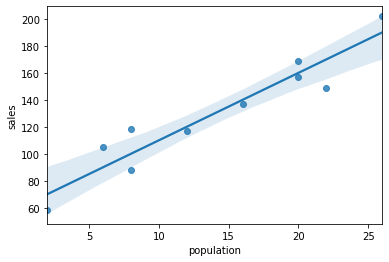

In [9]:
sns.regplot(data = df, x='population', y='sales')

In [11]:
# Calculate the residuals

pred = model_1.predict(X)
resid = y - pred
resid

array([-12.,  15., -12.,  18.,  -3.,  -3.,  -3.,   9., -21.,  12.])

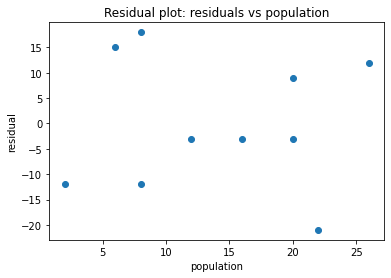

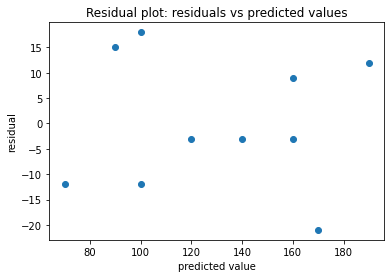

There is no obvious pattern in the residual plots


In [12]:
# Make a residual plot

plt.figure()
plt.scatter(df['population'], resid)
plt.xlabel('population')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs population')
plt.show()

plt.figure()
plt.scatter(pred, resid)
plt.xlabel('predicted value')
plt.ylabel('residual')
plt.title('Residual plot: residuals vs predicted values')
plt.show()

print('There is no obvious pattern in the residual plots')

In [13]:
# Calculate r and r^2
r_sq = model_1.score(X,y)
r = np.sqrt(r_sq)
print('Correlation coefficient: r = ', r)
print('Determination coefficient: r^2 = ', r_sq)

Correlation coefficient: r =  0.9501229552044079
Determination coefficient: r^2 =  0.9027336300063573


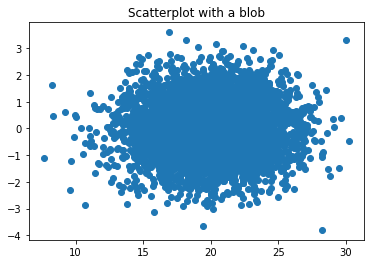

In [14]:
np.random.seed(666)
size_rand = 5000
a = stats.norm(20, 3).rvs(size=size_rand)
b = stats.norm(0, 1).rvs(size=size_rand)

plt.figure()
plt.scatter(a, b)
plt.title('Scatterplot with a blob')
plt.show()

### Example 2
The *Toyota Camry* is one of the best-selling cars in North America. The cost of a previously owned Camry depends upon many factors, including the model year, mileage, and condition. To investigate the relationship between the car's mileage and the sales price for a 2007 model year Camry, the data in `camry.csv` shows the mileage and sale price for 19 sales.
* Develop a scatter diagram with the car mileage on the horizontal axis and the price on the vertical axis. Interpret the relationship between the variables
* Develop the estimated regression equation that could be used to predict the price (1000s of dollars) given the miles (also in 1000s).
* Does the estimated regression model provide a good fit? Explain.
* Provide an interpretation for the slope and for the intercept of the estimated regression equation.
* Suppose that you are considering purchasing a previously owned 2007 Camry that has been driven 60,000 miles. Using the estimated regression model, predict the price for this car.

In [15]:
# Load the data

df = pd.read_csv('camry.csv')
df

# Make a scatter plot


,miles,price
0,22,16.2
1,29,16.0
2,36,13.8
3,47,11.5
4,63,12.5
5,77,12.9
6,73,11.2
7,87,13.0
8,92,11.8
9,101,10.8


In [ ]:
# Constructing the model


In [ ]:
# Establishing if the model is good
# Use r^2 and residuals


# Residual plot and the distribution of the residuals


In [ ]:
# Making a prediction about a Camry with 60,000 miles


### Example 3
Data in `body_fat.csv` contains info about body fat (in percent of weight), height, waist size, and chest size (all in cm) for a large sample of people.
* Load the data and visualize the dataset using `seaborn.pairplot()`
* Build a model for the percent of body fat using height, waist size and chest size as independent variables.
* Decide whether the model is appropriate by considering $r^2$ and the residual plot.
* Can this model be improved?

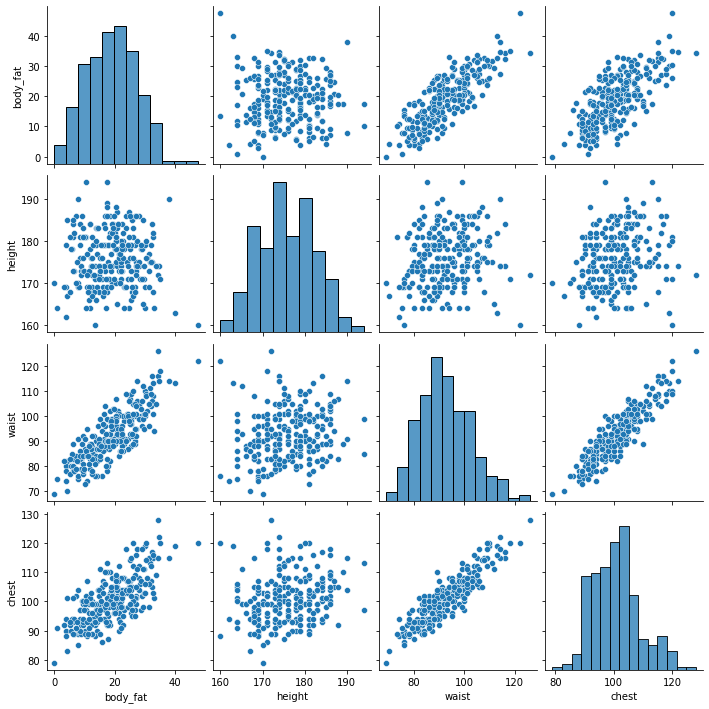

In [17]:
# Reading the data

df = pd.read_csv('body_fat.csv')
df

# Visualize the dataset

sns.pairplot(df)

In [21]:
# Building the model
X = df[['height', 'waist', 'chest']].to_numpy()
y = df['body_fat'].to_numpy()

model_3 = LinearRegression()
model_3.fit(X, y)

print(model_3.intercept_)
print(model_3.coef_)

1.52991728267326
[-0.22407689  0.84966289 -0.21390608]


Correlation coefficient: r =  0.8471612905729199
Determination coefficient: r^2 =  0.7176822522451751


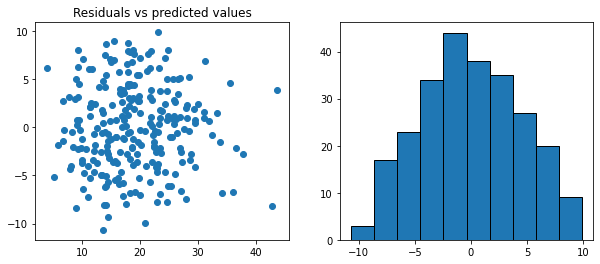

In [24]:
# Evaluating the model

r_sq = model_3.score(X,y)
r = np.sqrt(r_sq)
print('Correlation coefficient: r = ', r)
print('Determination coefficient: r^2 = ', r_sq)

# Residual plot and the distribution of the residuals

pred = model_3.predict(X)
resid = y - pred

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.scatter(pred, resid)
plt.title('Residuals vs predicted values')

plt.subplot(122)
plt.hist(resid, edgecolor = 'k')
plt.show()

### Example 4
The data in `life_expectancy.csv` contains information on various measures of the 50 United States:
* the Murder rate per 100,000 inhabitants
* High School Graduation rate in percent
* Income is per capita income in dollars
* Illiteracy rate per 1000 inhabitants
* Life Expectancy in years.

Build a linear regression model for *Life Expectancy* as a response (dependent) variable, using the remaining variables as input variables.

In [ ]:
# Load the data


In [ ]:
# Build the model


In [ ]:
# Evaluating the model


# Residual plot and the distribution of the residuals


### Example 5: fake linear relationship
A substance is slowly dissolving in acid. The data in `acid_solution.csv` contains measurements of the time (in minutes) after the start of the process, and percent of the substance that has dissolved by that time.
Is there evidence that there is a linear relationship between time passed and the percent of dissolved substance?

In [ ]:
# Load data


In [ ]:
# Build the model


In [ ]:
# Establishing if the model is good
# Use r^2 and residuals


# Residual plot and the distribution of the residuals
